# Introduction to CNN and computer vision with TF

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car.

## Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-09 10:20:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   103MB/s    in 1.0s    

2022-06-09 10:20:53 (103 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial thing is to becoming one with the data.

I mean visualizing lotd of them

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.


In [ ]:
# Another way to find out how many images are in a file
num_stake_images_train = len(os.listdir("pizza_steak/train/steak"))

num_stake_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  # Show the shape of the image
  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


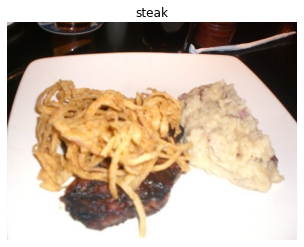

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
# View the image shape
img.shape # Returns the width, height, colour channels

(384, 512, 3)

## An end-to-end example

Let's build a CNN to find the patterns in our images, so we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find the patterns in our images
* Compile the CNN
* Fit the data to CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the ranodm seed
tf.random.set_seed(42)

# Preprocess data -> between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and trun it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
47*32

1504

In [ ]:

# Build a CNN model (same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
28/47 [================>.............] - ETA: 3s - loss: 0.6708 - accuracy: 0.6379

KeyboardInterrupt: ignored

## Using the same model as before

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 1.6169 - accuracy: 0.5693 - val_loss: 0.6004 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5583 - accuracy: 0.7180 - val_loss: 0.5919 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5253 - accuracy: 0.7373 - val_loss: 0.4698 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4872 - accuracy: 0.7800 - val_loss: 0.4344 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4787 - accuracy: 0.7740 - val_loss: 0.4543 - val_accuracy: 0.7980


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 200)               30105800  
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 300)               60300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


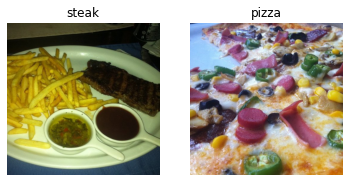

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all 10000 images at one time, a model might only look at 32 at a time.

It does it for a couple of reasons:
1. 10000 images (or more) might not fit into the memory
2. Trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well.

In [ ]:
# What is the processor that we're using in the google colab
!nvidia-smi

Wed May 25 09:56:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   1305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in batch data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first two images
images[:1], images[0].shape

(array([[[[0.39607847, 0.41960788, 0.47450984],
          [0.40000004, 0.42352945, 0.4784314 ],
          [0.4039216 , 0.427451  , 0.4901961 ],
          ...,
          [0.32156864, 0.3372549 , 0.37254903],
          [0.3254902 , 0.34117648, 0.37647063],
          [0.32156864, 0.3372549 , 0.37254903]],
 
         [[0.40000004, 0.42352945, 0.4784314 ],
          [0.4039216 , 0.427451  , 0.48235297],
          [0.4039216 , 0.427451  , 0.4901961 ],
          ...,
          [0.32156864, 0.34117648, 0.3647059 ],
          [0.3137255 , 0.33333334, 0.35686275],
          [0.3137255 , 0.33333334, 0.35686275]],
 
         [[0.40000004, 0.42352945, 0.4784314 ],
          [0.4039216 , 0.427451  , 0.48235297],
          [0.40784317, 0.43137258, 0.49411768],
          ...,
          [0.3372549 , 0.3529412 , 0.35686275],
          [0.3372549 , 0.3529412 , 0.35686275],
          [0.34117648, 0.35686275, 0.36078432]],
 
         ...,
 
         [[0.454902  , 0.5058824 , 0.5803922 ],
          [0.43529

In [ ]:
# View the first batch of labels
labels

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model

A baseline a relatively simple model or existing result that you wanna beat it.

**Note**: In deep learning there is almost infinite amount of architectures you could create. So start with a basic one and add complexity to it as required.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 13s 249ms/step - loss: 1.0710 - accuracy: 0.6793 - val_loss: 0.4783 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4174 - accuracy: 0.8280 - val_loss: 0.3931 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.2905 - accuracy: 0.8900 - val_loss: 0.3482 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.1418 - accuracy: 0.9560 - val_loss: 0.3332 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.0563 - accuracy: 0.9887 - val_loss: 0.4202 - val_accuracy: 0.8360


### 5. Evaluate our model
It looks like our model is learning something, so let's evaluate our model

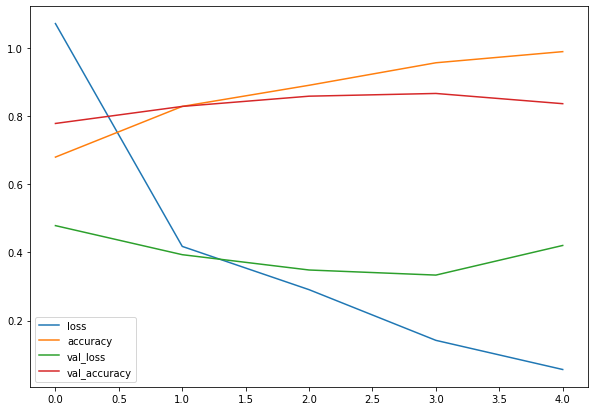

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure(figsize=(14, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

When a model's validation loss is increasing, it's likely that the model is overfitting the training dataset.

This means it learning the patters in the training dataset too well, so the model's ability to generalize would be dimished.

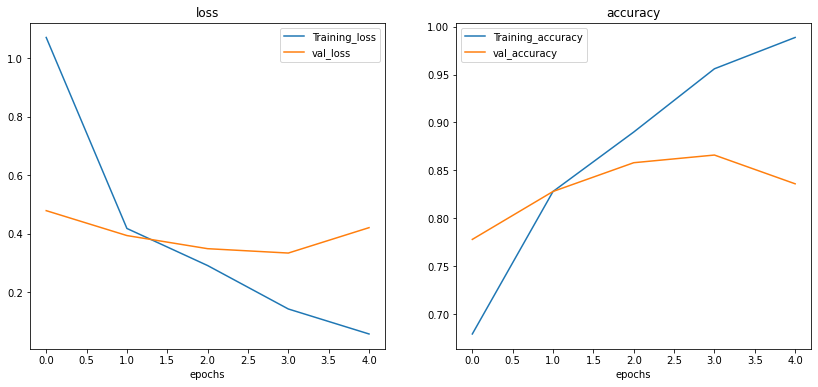

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Or

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.6031 - accuracy: 0.6753 - val_loss: 0.4749 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4562 - accuracy: 0.7973 - val_loss: 0.3733 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4090 - accuracy: 0.8260 - val_loss: 0.3624 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3943 - accuracy: 0.8333 - val_loss: 0.3340 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3599 - accuracy: 0.8467 - val_loss: 0.4033 - val_accuracy: 0.8160


In [ ]:
# Get a summary of our model with maxpooling layer
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

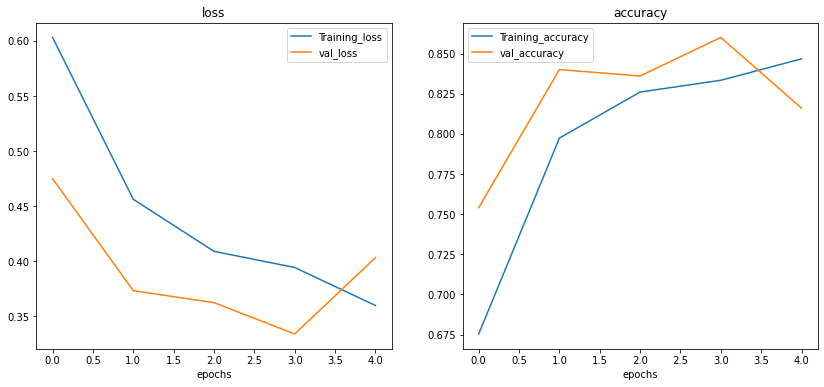

In [ ]:
# Plot the loss curves
plot_loss_curves(history_5)

### Openning our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGeneraor without data augmentation fot the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Let's visualize our data which is augmented
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
# Create non_augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# Create non_augmented test data batches
print("Non_augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non_augmented test data
Found 500 images belonging to 2 classes.


> **Note:** Data augmentationis usually used only for training data and not for testing data

In [ ]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number 7


Text(0.5, 1.0, 'Augmented image')

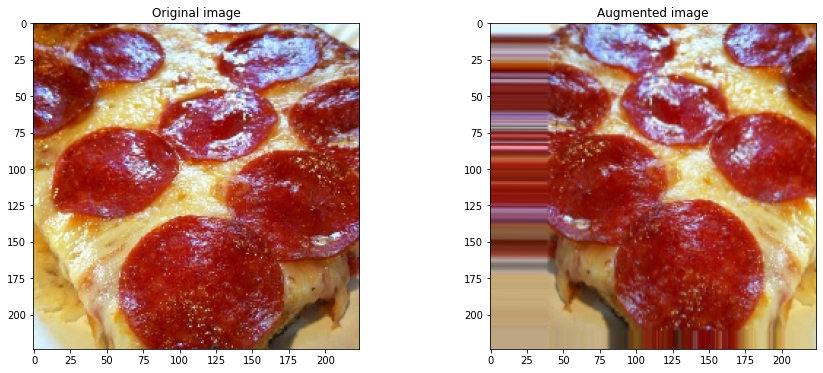

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)
print(f"Showing image number {random_number}")
plt.figure(figsize=(15, 6))
plt.axis("off")
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")

Let's create a model on augmented data

In [ ]:
# Create a model
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5638 - accuracy: 0.7407 - val_loss: 0.4489 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5823 - accuracy: 0.6933 - val_loss: 0.4417 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5136 - accuracy: 0.7620 - val_loss: 0.3751 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5288 - accuracy: 0.7533 - val_loss: 0.4046 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5272 - accuracy: 0.7500 - val_loss: 0.3628 - val_accuracy: 0.8560


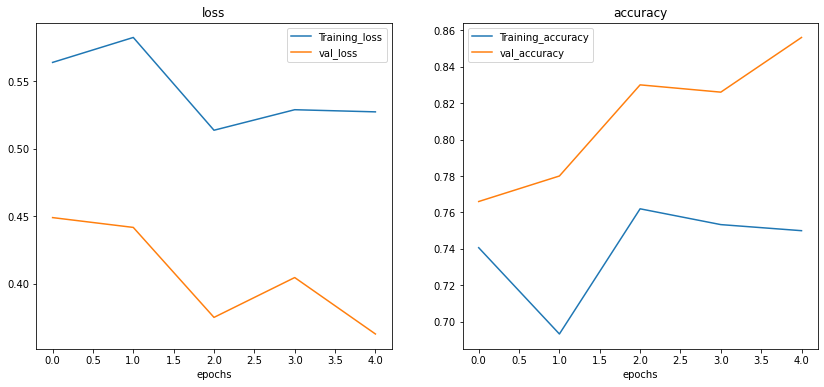

In [ ]:
# Check our models learning curves
plot_loss_curves(history_6)

Let's create model with shuffled data

In [ ]:
# Let's visualize our data which is augmented
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)
# Create non_augmented train data batches
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode="binary",
                                                        shuffle=np.True_)
# Create non_augmented test data batches
print("Non_augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non_augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Create the model_7
model_7 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 26s 542ms/step - loss: 0.6749 - accuracy: 0.5653 - val_loss: 0.5603 - val_accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 25s 535ms/step - loss: 0.5609 - accuracy: 0.7313 - val_loss: 0.4449 - val_accuracy: 0.8060
Epoch 3/10
47/47 [==============================] - 25s 529ms/step - loss: 0.5392 - accuracy: 0.7247 - val_loss: 0.4403 - val_accuracy: 0.8240
Epoch 4/10
47/47 [==============================] - 25s 534ms/step - loss: 0.5033 - accuracy: 0.7707 - val_loss: 0.3976 - val_accuracy: 0.8160
Epoch 5/10
47/47 [==============================] - 25s 537ms/step - loss: 0.4788 - accuracy: 0.7667 - val_loss: 0.3537 - val_accuracy: 0.8400
Epoch 6/10
47/47 [==============================] - 25s 539ms/step - loss: 0.4993 - accuracy: 0.7587 - val_loss: 0.4045 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 25s 537ms/step - loss: 0.4867 - accuracy: 0.7653 - val_loss: 0.3491 - val_accuracy: 0.8660

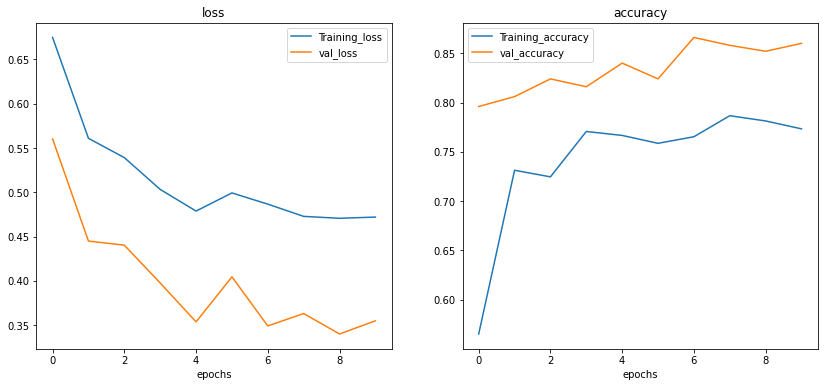

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of filters in each conv layer
* Training for longer
* Find ideal learning rate
* Get more data
* Use **transfer learning**

In [ ]:
# Create model_8 which is like the CNN Explainer site
model_8 = Sequential([
  Conv2D(20, 3, input_shape=(224, 224, 3), activation="relu", padding="same"),
  Conv2D(20, 3, activation="relu", padding="same"),
  MaxPool2D(),
  Conv2D(20, 3, activation="relu", padding="same"),
  Conv2D(20, 3, activation="relu", padding="same"),
  MaxPool2D(),
  Flatten(),
  Dense(100, activation="relu"),
  Dense(100, activation="relu"),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        epochs=10)

Epoch 1/10
47/47 [==============================] - 28s 578ms/step - loss: 0.6315 - accuracy: 0.6333 - val_loss: 0.3584 - val_accuracy: 0.8420
Epoch 2/10
47/47 [==============================] - 27s 569ms/step - loss: 0.4717 - accuracy: 0.7840 - val_loss: 0.3557 - val_accuracy: 0.8620
Epoch 3/10
47/47 [==============================] - 27s 570ms/step - loss: 0.4997 - accuracy: 0.7760 - val_loss: 0.3731 - val_accuracy: 0.8420
Epoch 4/10
47/47 [==============================] - 27s 569ms/step - loss: 0.4569 - accuracy: 0.7907 - val_loss: 0.3893 - val_accuracy: 0.8280
Epoch 5/10
47/47 [==============================] - 27s 569ms/step - loss: 0.4574 - accuracy: 0.7860 - val_loss: 0.4321 - val_accuracy: 0.8040
Epoch 6/10
47/47 [==============================] - 27s 567ms/step - loss: 0.4345 - accuracy: 0.8100 - val_loss: 0.3413 - val_accuracy: 0.8460
Epoch 7/10
47/47 [==============================] - 26s 552ms/step - loss: 0.3990 - accuracy: 0.8213 - val_loss: 0.4031 - val_accuracy: 0.8060

In [ ]:
model_8.evaluate(test_data)

16/16 [==============================] - 3s 167ms/step - loss: 0.2847 - accuracy: 0.8700


[0.2847326397895813, 0.8700000047683716]

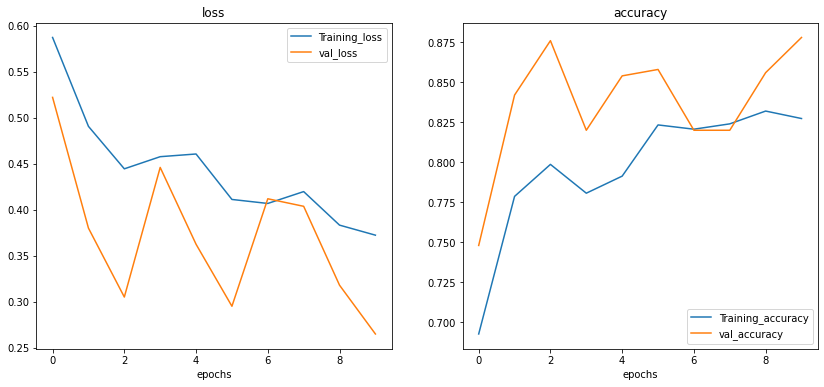

In [ ]:
# Plot the loss curves
plot_loss_curves(history_8)

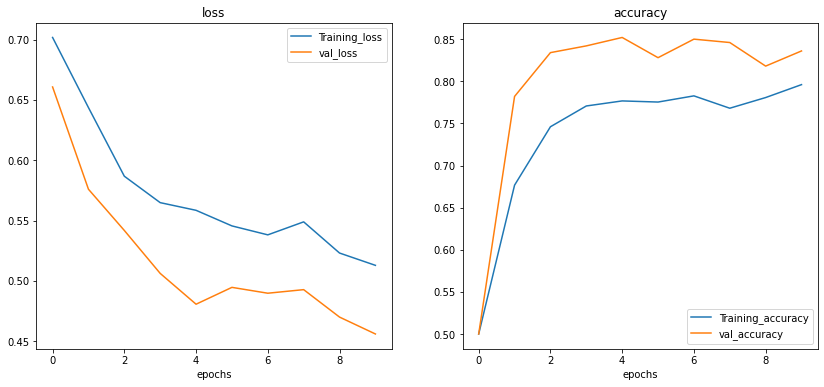

In [ ]:
# Plot the loss curves
plot_loss_curves(history_8)